In [1]:
# load libraries
import pandas as pd
import sys, os
os.getcwd()
os.chdir("D:\Kaggle\Kmeans")

In [2]:
# read offers 
df_offers = pd.read_excel("WineKMC.xlsx", sheetname =0)
df_offers.columns = ['Offer_id','Campaign', 'Varietal','Minimum Qty', 'Discount','Origin', 'Past Peak']
df_trans = pd.read_excel("WineKMC.xlsx", sheetname = 1) # reading transactions table
df_trans.columns = ['Customer last name', 'Offer_id']
df_trans['n'] = 1
df_trans.head()

,Customer last name,Offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [3]:
df = pd.merge(df_offers, df_trans) # join the offers, transactions table
matrix = df.pivot_table(index = ['Customer last name'], columns = ['Offer_id'], values = 'n')
matrix = matrix.fillna(0).reset_index()
x_cols = matrix.columns[1:]

In [4]:
# import KMeans library
from sklearn.cluster import KMeans

In [12]:
cluster = KMeans(n_clusters = 5)
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

1    34
4    21
0    16
3    15
2    14
dtype: int64

In [6]:
# principal component analysis - PCA
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 2)
matrix['X'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['Y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix.reset_index()
customer_cluster = matrix[['Customer last name', 'cluster', 'X','Y']]

In [8]:
df = pd.merge(df_trans,customer_cluster)
df = pd.merge(df_offers, df)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from ggplot import *

In [14]:
df.head()

,Offer_id,Campaign,Varietal,Minimum Qty,Discount,Origin,Past Peak,Customer last name,n,cluster,X,Y
0,1,January,Malbec,72,56,France,False,Thomas,1,4,1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,1,4,0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,1,2,0.342938,0.302186
3,1,January,Malbec,72,56,France,False,Peterson,1,2,0.797379,0.475995
4,1,January,Malbec,72,56,France,False,Wood,1,1,0.551215,-0.395670


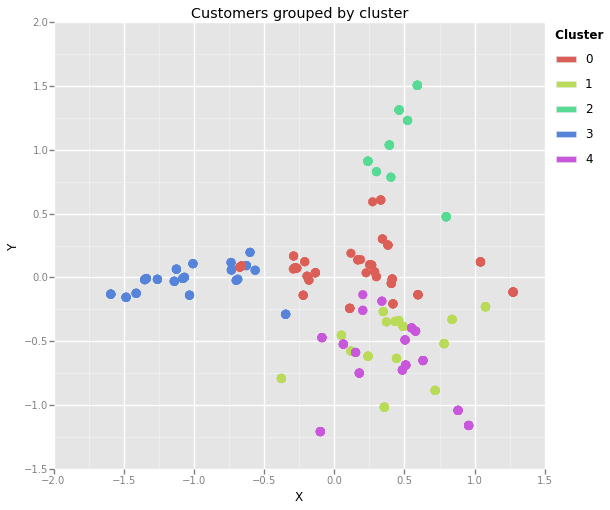

<ggplot: (19905833)>

In [10]:
ggplot(df, aes(x = 'X', y = 'Y', color = 'cluster')) + geom_point(size = 75) + ggtitle("Customers grouped by cluster")

In [20]:
df['is_4'] = df.cluster == 4
df.groupby('is_4').Varietal.value_counts()

is_4                     
False  Champagne             48
       Pinot Noir            43
       Espumante             36
       Prosecco              32
       Malbec                27
       Cabernet Sauvignon    25
       Merlot                18
       Pinot Grigio          17
       Chardonnay            12
True   Champagne             33
       Prosecco              11
       Cabernet Sauvignon     7
       Malbec                 5
       Espumante              4
       Chardonnay             3
       Merlot                 2
       Pinot Noir             1
dtype: int64

In [25]:
df.groupby('is_4')[['Minimum Qty','Discount']].mean()

,Minimum Qty,Discount
is_4,,
False,55.046512,58.027132
True,71.545455,65.166667


In [23]:
df['is_1'] = df.cluster == 1
df.groupby('is_1').Varietal.value_counts()

is_1                     
False  Champagne             50
       Pinot Noir            42
       Prosecco              35
       Espumante             34
       Malbec                27
       Cabernet Sauvignon    25
       Pinot Grigio          17
       Merlot                17
       Chardonnay            13
True   Champagne             31
       Prosecco               8
       Cabernet Sauvignon     7
       Espumante              6
       Malbec                 5
       Merlot                 3
       Chardonnay             2
       Pinot Noir             2
dtype: int64